In [5]:
import sys
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import lmfit
from lmfit import Model

from importlib import reload

import wave8_data as wave8
reload(wave8)

sys.path.append('../')
import svd_waveform_processing as proc
reload(proc)

<module 'svd_waveform_processing' from '../svd_waveform_processing.py'>

In [6]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

In [7]:
def removeBackground(signal, ave_window=[0,500]):
    """
    Set the baseline of the waveform to 0
    """
    if signal.ndim ==1:
        return signal - np.median(signal[ave_window[0]:ave_window[1]])
    elif signal.ndim==2:
        med = np.median(signal[:,ave_window[0]:ave_window[1]], axis=1)  
        return signal - med.reshape(med.shape[0],1)

def fitfun(t, A, tau, c, m):
    return A*np.exp(-t/tau)+c+m*t

# Decay of the APD signal (2020-06-23)

## _6: 100 Hz

Events read: 46047


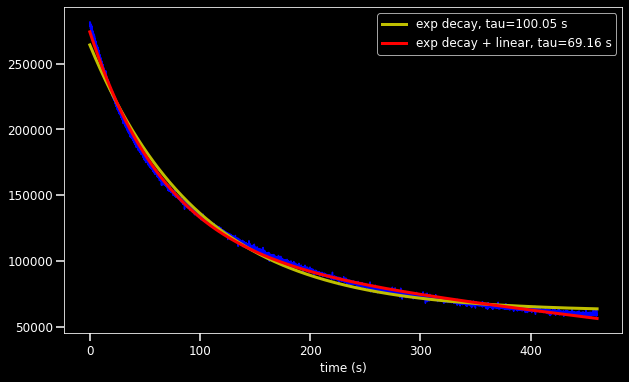

In [8]:
f = 100 # Hz
file = Path('./data/20200623_6.dat')
data = wave8.get_intensities(file)

yd = data[:,1]
xd = np.arange(yd.shape[0])/f
xd = xd[yd>5000]
yd = yd[yd>5000]

model = Model(fitfun)
params = model.make_params()
params['A'].set(value=300000, vary=True)
params['tau'].set(value=10, vary=True)
params['c'].set(value=0, vary=True)
params['m'].set(value=0, vary=False)
res = model.fit(yd, params, t=xd)

params['m'].set(value=0, vary=True)
res_lin = model.fit(yd, params, t=xd)


fig, ax = plt.subplots()
ax.plot(xd,yd, c='b')
ax.plot(xd, res.best_fit, linewidth=3, c='y', 
        label='exp decay, tau={:.2f} s'.format(res.params['tau'].value))
ax.plot(xd, res_lin.best_fit, linewidth=3, c='r', 
        label='exp decay + linear, tau={:.2f} s'.format(res_lin.params['tau'].value))
ax.legend()
ax.set_xlabel('time (s)')
plt.show()

In [9]:
xd.shape

(23011,)

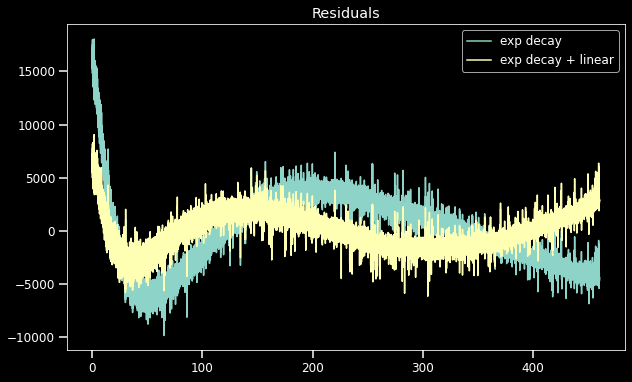

In [10]:
fig, ax = plt.subplots()
ax.set_title('Residuals')
ax.plot(xd, yd-res.best_fit, label='exp decay')
ax.plot(xd, yd-res_lin.best_fit, label='exp decay + linear')
ax.legend()
plt.show()

In [11]:
print(res.fit_report())
print('\n')
print(res_lin.fit_report())

[[Model]]
    Model(fitfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 23011
    # variables        = 3
    chi-square         = 2.9501e+11
    reduced chi-square = 12822258.6
    Akaike info crit   = 376616.976
    Bayesian info crit = 376641.108
[[Variables]]
    A:    202891.759 +/- 101.788729 (0.05%) (init = 300000)
    tau:  100.048240 +/- 0.11456869 (0.11%) (init = 10)
    c:    61451.1979 +/- 50.3337466 (0.08%) (init = 0)
    m:    0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, c) = -0.785
    C(A, tau) = -0.371


[[Model]]
    Model(fitfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 23011
    # variables        = 4
    chi-square         = 6.9205e+10
    reduced chi-square = 3007986.74
    Akaike info crit   = 343254.060
    Bayesian info crit = 343286.235
[[Variables]]
    A:    171468.951 +/- 94.9291555 (0.06%) (init = 300000

## _7: 10 Hz

Events read: 6040


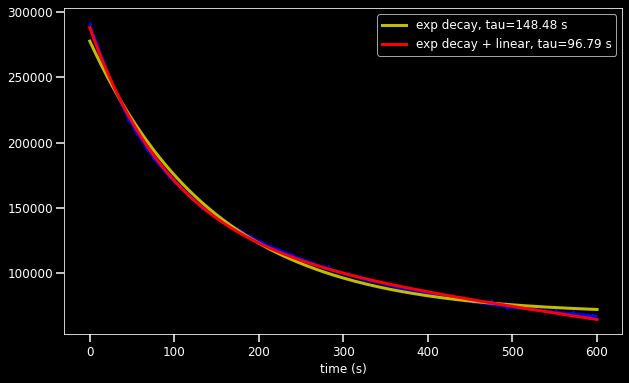

In [12]:
f = 10 # Hz
file = Path('./data/20200623_7.dat')
data = wave8.get_intensities(file)

yd = data[:,1]
xd = np.arange(yd.shape[0])/f
xd = xd[yd>5000]
yd = yd[yd>5000]

model = Model(fitfun)
params = model.make_params()
params['A'].set(value=250000, vary=True)
params['tau'].set(value=100, vary=True)
params['c'].set(value=0, vary=True)
params['m'].set(value=0, vary=False)
res = model.fit(yd, params, t=xd)

params['m'].set(value=0, vary=True)
res_lin = model.fit(yd, params, t=xd)



fig, ax = plt.subplots()
ax.plot(xd,yd, c='b')
ax.plot(xd, res.best_fit, linewidth=3, c='y', 
        label='exp decay, tau={:.2f} s'.format(res.params['tau'].value))
ax.plot(xd, res_lin.best_fit, linewidth=3, c='r', 
        label='exp decay + linear, tau={:.2f} s'.format(res_lin.params['tau'].value))
ax.legend()
ax.set_xlabel('time (s)')
plt.show()

In [13]:
xd.shape

(2998,)

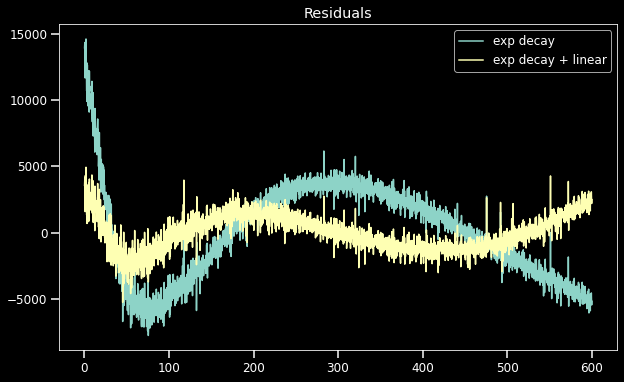

In [14]:
fig, ax = plt.subplots()
ax.set_title('Residuals')
ax.plot(xd, yd-res.best_fit, label='exp decay')
ax.plot(xd, yd-res_lin.best_fit, label='exp decay + linear')
ax.legend()
plt.show()

In [15]:
print(res.fit_report())
print('\n')
print(res_lin.fit_report())

[[Model]]
    Model(fitfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 2998
    # variables        = 3
    chi-square         = 3.7894e+10
    reduced chi-square = 12652500.8
    Akaike info crit   = 49030.3881
    Bayesian info crit = 49048.4052
[[Variables]]
    A:    209429.286 +/- 265.277043 (0.13%) (init = 250000)
    tau:  148.478130 +/- 0.47303162 (0.32%) (init = 100)
    c:    68409.6796 +/- 160.781187 (0.24%) (init = 0)
    m:    0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, c) = -0.829
    C(A, tau) = -0.267
    C(A, c)   = -0.151


[[Model]]
    Model(fitfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 2998
    # variables        = 4
    chi-square         = 5.4395e+09
    reduced chi-square = 1816799.65
    Akaike info crit   = 43212.9334
    Bayesian info crit = 43236.9562
[[Variables]]
    A:    167672.578 +/- 223.401972 

# After removing the capacitor

Events read: 5510


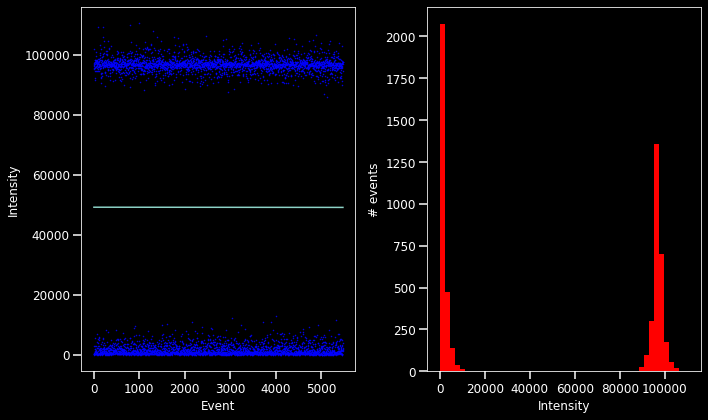

In [35]:
f = 1 # Hz
file = Path('./data/20200624_2.dat')
data = wave8.get_intensities(file)

yd = data[:,1]
xd = np.arange(yd.shape[0])/f
# xd = xd[yd>20000]
# yd = yd[yd>20000]
# xd = xd[yd<20000]
# yd = yd[yd<20000]

fit = np.polyfit(xd, yd, 1)
fit = np.poly1d(fit)
yfit = fit(xd)
yd_corr = yd-(yfit-yfit[0])



fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].plot(xd,yd, '.', c='b', markersize=1)
ax[0].plot(xd,yfit)
ax[0].set_xlabel('Event')
ax[0].set_ylabel('Intensity')
ax[1].hist(yd, bins=50, color='r')
# ax[1].hist(yd_corr, bins=50, alpha=0.4, color='blue', label='with correction')
# ax[1].legend()
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('# events')
plt.tight_layout()
plt.show()

In [22]:
# fig.savefig('./data_june2020_ch2.png')

In [23]:
yd.shape

(2740,)

In [24]:
average = np.mean(yd)
sigma = np.std(yd)
print('APD standard deviation/mean:',sigma/average)

APD standard deviation/mean: 0.023740832952288123


In [20]:
average = np.mean(yd_corr)
sigma = np.std(yd_corr)
print('APD standard deviation/mean with correction:',sigma/average)

APD standard deviation/mean with correction: 0.9692822675794036


## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### Compare new data to old data: did the format change?

In [18]:
file = Path('./data/20200623_2.dat')
events = wave8.file2frames(file)
wave8data = wave8.descramble_frame(events[0])
wave8data

Events read: 4212


{'ProcQuadSel': 0,
 'Proc': array([7.21000000e+03, 6.91539528e-01, 7.09570042e-01]),
 'IntBlSize': 32,
 'IntSize': 100,
 'IntDelay': 50,
 'Int': array([5983,  115,  180,  932,   47,   60,   14,   92], dtype=uint32)}

In [19]:
file = Path('./data/data3.dat')
events = wave8.file2frames(file)
wave8data = wave8.descramble_frame(events[0])
wave8data

Events read: 390


{'ProcQuadSel': 0,
 'Proc': array([ 5.88930000e+04, -9.85023687e-01,  3.08406772e-01]),
 'IntBlSize': 8,
 'IntSize': 25,
 'IntDelay': 45,
 'Int': array([  357,    84, 38171, 20281,   163,    52,     7,    37],
       dtype=uint32),
 'Wave3': array([33339, 33348, 33337, 33334, 33341, 33340, 33342, 33340, 33335,
        33341, 33341, 33347, 33332, 33339, 33337, 33333, 33339, 33347,
        33342, 33337, 33337, 33340, 33344, 33336, 33345, 33345, 33341,
        33363, 33347, 33332, 33331, 33341, 33342, 33342, 33332, 33335,
        33342, 33352, 33340, 33348, 33340, 33338, 33344, 33338, 33333,
        33340, 33346, 33351, 33413, 33719, 34243, 34506, 34331, 34210,
        34318, 34318, 34255, 34283, 34304, 34254, 34251, 34256, 34241,
        34215, 34215, 34195, 34198, 34184, 34169, 34146, 34130, 34122,
        34108, 34085, 34073, 34053, 34037, 34028, 34011, 33996, 33986,
        33975, 33954, 33943, 33915, 33902, 33893, 33869, 33855, 33855,
        33843, 33829, 33814, 33791, 33777, 33764,

In [20]:
f = Path('./data/data3.dat')
# f = Path('./data/20200623_2.dat')
ret = []
fileOffset = 0
numberOfFrames = 0

file_header = np.fromfile(f, dtype='uint32', count=2, offset=fileOffset)
payloadSize = int(file_header[0]/4)-1
payload = np.fromfile(f, dtype='uint32', count=payloadSize, offset=fileOffset+8)
fileOffset = fileOffset + file_header[0]+4

In [21]:
print(file_header)
print(payloadSize)
print(payload)
print(fileOffset)

[    1180 16777218]
294
[     44065          0  905326809  201326611  993404336  952298632
 3677159425    8748758          0          0         32   33554432
 2181857919 2190770740 2185724535 2194506358 2183168652 2192671306
 2188018335 2188608104 2188214894 2192671357 2189656762 2186773056
 2191426188 2190115445 2190377656 2188214860 2193195716 2190312054
 2188411544 2189918805 2191950528 2191360644 2268562288 2459078236
 2365296657 2370473333 2337901500 2277280356 2211612013 2215019259
 2243593619 2249819592 2246018522 2245297704 2243265896 2237892060
 2238481722 2230486368 2233566440 2228520195 2226160824 2223932570
 2221442175 2219476042 2215740476 2216330242 2206696403 2212987834
 2202043285 2206761815 2197586762 2204664624 2192605942 2198962916
 2194113260 2193064650 2187297415 2190246510 2190639773 2180022867
 2185658853 2182120019 2183168513 2181333541 2179629563 2177663450
 2179760613 2175959475 2180809220 2174517653 2173862340 2172354886
 2176418263 2172485985 2175107523 2169

In [22]:
# f = Path('./data/data3.dat')
f = Path('./data/20200624_2.dat')
ret = []
fileOffset = 0
numberOfFrames = 0

file_header = np.fromfile(f, dtype='uint32', count=2, offset=fileOffset)
payloadSize = int(file_header[0]/4)-1
payload = np.fromfile(f, dtype='uint32', count=payloadSize, offset=fileOffset+8)
fileOffset = fileOffset + file_header[0]+4

In [23]:
print(file_header)
print(payloadSize)
print(payload)
print(fileOffset)

[     100 16777218]
24
[      5921          0      12860     333848          0        409
         10        635          4         38        168        107
         40   33554954          0       6168          0 1083209728
  619388073 3217860876 3626680165 3220137101         32   33554955]
104


In [24]:
def search_sequence(arr,seq):
    """ Find sequence in an array using NumPy only.

    Parameters
    ----------    
    arr    : input 1D array
    seq    : input 1D array

    Output
    ------    
    Output : 1D Array of indices in the input array that satisfy the 
    matching of input sequence in the input array.
    In case of no match, an empty list is returned.
    """

    # Store sizes of input array and sequence
    Na, Nseq = arr.size, seq.size

    # Range of sequence
    r_seq = np.arange(Nseq)

    # Create a 2D array of sliding indices across the entire length of input array.
    # Match up with the input sequence & get the matching starting indices.
    M = (arr[np.arange(Na-Nseq+1)[:,None] + r_seq] == seq).all(1)
    return np.where(M==True)[0]

#     # Get the range of those indices as final output
#     if M.any() >0:
#         return np.where(np.convolve(M,np.ones((Nseq),dtype=int))>0)[0]
#     else:
#         return []         # No match found

In [26]:
f = Path('./data/data3.dat')
dold = np.fromfile(f, dtype='uint32')
print(dold[:8])

match = search_sequence(dold,dold[:2])
match[:10]

[     1180  16777218     44065         0 905326809 201326611 993404336
 952298632]


array([   0,  296,  592,  888, 1184, 1480, 1776, 2072, 2368, 2664])

In [28]:
f = Path('./data/20200624_2.dat')
dnew = np.fromfile(f, dtype='uint32')
print(dnew[:8])

match = search_sequence(dnew,dnew[:2])
match[:10]

[     100 16777218     5921        0    12860   333848        0      409]


array([  0,  26,  52,  78, 104, 130, 156, 182, 288, 314])

In [29]:
def file2frames(f):
    '''
    reads rogue binary file and returns a list of events
    '''
    ret = []
    fileOffset = 0
    numberOfFrames = 0
    while True:
        try:
            
            file_header = np.fromfile(f, dtype='uint32', count=2, offset=fileOffset)
            payloadSize = int(file_header[0]/4)-1
            payload = np.fromfile(f, dtype='uint32', count=payloadSize, offset=fileOffset+8)
            fileOffset = fileOffset + file_header[0]+4
            
#             print(payloadSize)
#             print(payload)
#             print(file_header[0])
            
            ret.append(payload)
            numberOfFrames = numberOfFrames + 1 
            
        except Exception: 
            #e = sys.exc_info()[0]
            #print ("Message\n", e)
            print("Events read: %d"%numberOfFrames)
            break
    
    
    return ret

In [30]:
# f = Path('./data/data3.dat')
f = Path('./data/20200623_2.dat')
dat = file2frames(f)

Events read: 4212
